<a href="https://colab.research.google.com/github/janel-dsbc/Deep-Dive-Projects/blob/main/Final_Project4_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


Presentation:  https://slidesgo.com/editor/share/9c780fc2-06a9-45ae-9a55-fbd1f2c01075#rs=link

This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.



The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project should be done using tree-based regression techniques as covered in class. The parameters of the trees should be carefully selected to avoid over-fitting.


There are two main challenges for this project:

1. Choosing appropriate predictors. When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



#Imports

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import graphviz
from IPython.display import display
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pickle

In [76]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: RWA8wjNK0xLfqh5eocL17KnBMwnvPkOAOJjBgh8Plb69fsb2ku6oiRqq24Oh3TDlOvUODP7EGxQ=
x-amz-request-id: WDMJ5GR6DCA4YT0Q
Date: Thu, 18 Jul 2024 20:25:12 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Server: AmazonS3
Content-Length: 738124



Read in the data into a Pandas Dataframe

In [77]:
spotify = pd.read_csv( url, index_col = 0 )

Look at the head of the data.

In [78]:
spotify.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [79]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Week of Highest Charting   1556 non-null   object
 3   Song Name                  1556 non-null   object
 4   Streams                    1556 non-null   object
 5   Artist                     1556 non-null   object
 6   Artist Followers           1556 non-null   object
 7   Song ID                    1556 non-null   object
 8   Genre                      1556 non-null   object
 9   Release Date               1556 non-null   object
 10  Weeks Charted              1556 non-null   object
 11  Popularity                 1556 non-null   object
 12  Danceability               1556 non-null   object
 13  Energy                     1556 non-null   object
 14  Loudness     

In [80]:
spotify.columns.to_list()

['Highest Charting Position',
 'Number of Times Charted',
 'Week of Highest Charting',
 'Song Name',
 'Streams',
 'Artist',
 'Artist Followers',
 'Song ID',
 'Genre',
 'Release Date',
 'Weeks Charted',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence',
 'Chord']

The features are mainly objects.  In order to do our analysis, we will need to convert to numerical data types.

In [81]:
#spotify['Streams'] = spotify['Streams'].str.replace(',', '').astype(int)

#Cleaning the Data

##Dropped Columns

I drop a lot of the columns that I imagine we would not know about a song that is about to come out.

In [82]:
spotify_clean = spotify.drop(columns = ['Artist', 'Genre',
                                        'Song Name', 'Streams',
                                        'Week of Highest Charting',
                                        'Number of Times Charted',
                                        'Highest Charting Position',
                                        'Weeks Charted', 'Song ID',
                                        'Release Date'])

In [83]:
spotify_clean

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,
1,3377762,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2230022,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,6266514,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,83293380,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5473565,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,27167675,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1553,15019109,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1554,22698747,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D


I found that some rows contain spaces and so we are unable to convert them to a numerical data type until we find and eliminate them.

In [84]:
np.where(spotify_clean['Energy'] ==' ')

(array([  35,  163,  464,  530,  636,  654,  750,  784,  876, 1140, 1538]),)

In [85]:
np.where(spotify_clean['Energy'] ==' ').index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [86]:
spotify_clean.shape

(1556, 12)

We look at the rows where there are spaces.  These rows are the same across many columns.

In [87]:
spotify[spotify_clean['Artist Followers']==' ']

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,,...,,,,,,,,,,
164,5,39,2020-10-30--2020-11-06,34+35,"5,453,159",Ariana Grande,,,,,...,,,,,,,,,,
465,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),"6,292,362",Rod Wave,,,,,...,,,,,,,,,,
531,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...","6,162,453",Ariana Grande,,,,,...,,,,,,,,,,
637,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,"8,804,531",Chris Rea,,,,,...,,,,,,,,,,
655,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,"10,509,961",Queen,,,,,...,,,,,,,,,,
751,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...","5,358,940",Tainy,,,,,...,,,,,,,,,,
785,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...","4,739,241","Super Yei, Jone Quest",,,,,...,,,,,,,,,,
877,164,4,2020-09-18--2020-09-25,+Linda,"4,964,708",Dalex,,,,,...,,,,,,,,,,


We drop the rows that have spaces.

In [88]:
spotify_clean = spotify_clean.drop(spotify[(spotify['Artist Followers']==' ')].index)

In [89]:
spotify_clean.shape

(1545, 12)

We look at the statistics available for our Spotify_clean data.

In [90]:
spotify_clean.describe().transpose()

,count,unique,top,freq
Artist Followers,1545,599,42227614,52
Popularity,1545,69,75,67
Danceability,1545,529,0.668,10
Energy,1545,574,0.621,10
Loudness,1545,1393,-5.382,4
Speechiness,1545,771,0.102,15
Acousticness,1545,964,0.114,10
Liveness,1545,605,0.103,23
Tempo,1545,1460,93.005,3
Duration (ms),1545,1485,212867,3


In [91]:
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 1 to 1556
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist Followers  1545 non-null   object
 1   Popularity        1545 non-null   object
 2   Danceability      1545 non-null   object
 3   Energy            1545 non-null   object
 4   Loudness          1545 non-null   object
 5   Speechiness       1545 non-null   object
 6   Acousticness      1545 non-null   object
 7   Liveness          1545 non-null   object
 8   Tempo             1545 non-null   object
 9   Duration (ms)     1545 non-null   object
 10  Valence           1545 non-null   object
 11  Chord             1545 non-null   object
dtypes: object(12)
memory usage: 156.9+ KB


There are still many object data types.  Let's look to see if there are any nulls to deal with.

In [92]:
spotify_clean.isnull().sum()*100

Artist Followers    0
Popularity          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Liveness            0
Tempo               0
Duration (ms)       0
Valence             0
Chord               0
dtype: int64

We convert the columns to float64.

In [93]:
spotify_clean[['Artist Followers','Danceability', 'Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness',
               'Tempo', 'Duration (ms)', 'Valence', 'Popularity',]] = spotify_clean[['Artist Followers', 'Danceability',
                'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)',
                'Valence', 'Popularity']].astype('float64')

We check to see if it has worked.  The shape of Spotify_clean is (1545, 12)

In [94]:
spotify_clean.shape

(1545, 12)

We see that the columns have been converted to float datatypes.

In [95]:
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 1 to 1556
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Followers  1545 non-null   float64
 1   Popularity        1545 non-null   float64
 2   Danceability      1545 non-null   float64
 3   Energy            1545 non-null   float64
 4   Loudness          1545 non-null   float64
 5   Speechiness       1545 non-null   float64
 6   Acousticness      1545 non-null   float64
 7   Liveness          1545 non-null   float64
 8   Tempo             1545 non-null   float64
 9   Duration (ms)     1545 non-null   float64
 10  Valence           1545 non-null   float64
 11  Chord             1545 non-null   object 
dtypes: float64(11), object(1)
memory usage: 156.9+ KB


#EDA

I may not drop Genres in a next iteration so I will keep the code to one-hot encode perhaps in another instance.

In [96]:
#One hot encode for Genre Column
#spotify_drop = pd.get_dummies(spotify_drop, columns=["Genre"])

We take a look at the column that is still an object.

In [97]:
spotify_clean['Chord']

Index
1           B
2       C#/Db
3           A
4           B
5       D#/Eb
        ...  
1552        A
1553        B
1554        D
1555        F
1556        G
Name: Chord, Length: 1545, dtype: object

In [98]:
spotify_clean.head()

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,
1,3377762.0,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
2,2230022.0,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
3,6266514.0,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
4,83293380.0,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
5,5473565.0,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


##Kept Columns

These are the columns that we keep in this iteration.

In [99]:
spotify_clean.columns

Index(['Artist Followers', 'Popularity', 'Danceability', 'Energy', 'Loudness',
       'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)',
       'Valence', 'Chord'],
      dtype='object')

We keep this cleaned data in a json file for future iterations.

In [100]:
spotify_clean.to_json(path_or_buf= 'spotify_clean.json', orient = "table")

In [101]:
#if 'Genre' in spotify_drop:
 # print("It's in the list")

In [102]:
#np.where(spotify['Genre'])

In [103]:
#spotify['Genre'] = spotify['Genre'].replace({'indie rock italiano': 0, 'italian pop': 1, 'australian hip hop': 2, 'pop': 3, 'uk pop': 4, })


We do a one hot encode for the Chord column

In [104]:
#One hot encode for Chord column
spotify_clean = pd.get_dummies(spotify_clean, columns=["Chord"])

In [105]:
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 1 to 1556
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Followers  1545 non-null   float64
 1   Popularity        1545 non-null   float64
 2   Danceability      1545 non-null   float64
 3   Energy            1545 non-null   float64
 4   Loudness          1545 non-null   float64
 5   Speechiness       1545 non-null   float64
 6   Acousticness      1545 non-null   float64
 7   Liveness          1545 non-null   float64
 8   Tempo             1545 non-null   float64
 9   Duration (ms)     1545 non-null   float64
 10  Valence           1545 non-null   float64
 11  Chord_A           1545 non-null   bool   
 12  Chord_A#/Bb       1545 non-null   bool   
 13  Chord_B           1545 non-null   bool   
 14  Chord_C           1545 non-null   bool   
 15  Chord_C#/Db       1545 non-null   bool   
 16  Chord_D           1545 non-null   bool   
 17  

In [106]:
spotify_clean.isnull().sum().sum()

0

In [107]:
spotify_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Artist Followers,1545.0,1.471690e+07,1.667579e+07,4883.000000,2.123734e+06,6.852509e+06,2.269875e+07,8.333778e+07
Popularity,1545.0,7.008932e+01,1.582403e+01,0.000000,6.500000e+01,7.300000e+01,8.000000e+01,1.000000e+02
Danceability,1545.0,6.899968e-01,1.424440e-01,0.150000,5.990000e-01,7.070000e-01,7.960000e-01,9.800000e-01
Energy,1545.0,6.334951e-01,1.615770e-01,0.054000,5.320000e-01,6.420000e-01,7.520000e-01,9.700000e-01
Loudness,1545.0,-6.348474e+00,2.509281e+00,-25.166000,-7.491000e+00,-5.990000e+00,-4.711000e+00,1.509000e+00
Speechiness,1545.0,1.236557e-01,1.103827e-01,0.023200,4.560000e-02,7.650000e-02,1.650000e-01,8.840000e-01
Acousticness,1545.0,2.486945e-01,2.503259e-01,0.000025,4.850000e-02,1.610000e-01,3.880000e-01,9.940000e-01
Liveness,1545.0,1.812024e-01,1.440710e-01,0.019700,9.660000e-02,1.240000e-01,2.170000e-01,9.620000e-01
Tempo,1545.0,1.228110e+02,2.959109e+01,46.718000,9.796000e+01,1.220120e+02,1.438600e+02,2.052720e+02
Duration (ms),1545.0,1.979408e+05,4.714893e+04,30133.000000,1.692660e+05,1.935910e+05,2.189020e+05,5.881390e+05


In [108]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)'

In [109]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=4)

'X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=4)'

In [110]:
correlation_matrix = spotify_clean.corr()

In [111]:
print(correlation_matrix['Artist Followers'].sort_values(ascending=False))

Artist Followers    1.000000
Duration (ms)       0.142145
Popularity          0.104358
Chord_C             0.058909
Chord_A             0.030509
Chord_F             0.025804
Acousticness        0.023830
Chord_E             0.018885
Chord_G             0.007583
Chord_A#/Bb         0.000863
Chord_D            -0.005232
Chord_D#/Eb        -0.011527
Liveness           -0.012491
Chord_C#/Db        -0.015644
Tempo              -0.019881
Chord_G#/Ab        -0.026775
Loudness           -0.033264
Chord_F#/Gb        -0.034006
Chord_B            -0.052215
Energy             -0.065613
Speechiness        -0.072968
Danceability       -0.097576
Valence            -0.108804
Name: Artist Followers, dtype: float64


#Data Processing

##Decision Tree

We begin by running a decision tree.  I pick a target of "Artist Followers."  

In [112]:
X = spotify_clean.drop('Artist Followers', axis = 1)
y = spotify_clean['Artist Followers']

In [113]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3)         # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)}")

CV RMSE: 16245016.72


In [114]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )


In [115]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,1.652412e+07,7.870378e+05
1,2,1.630628e+07,7.582685e+05
2,3,1.628189e+07,8.241428e+05
3,4,1.654724e+07,8.423381e+05
4,5,1.689922e+07,9.007128e+05
5,6,1.724408e+07,9.065330e+05
6,7,1.774702e+07,9.478141e+05
7,8,1.830479e+07,1.040911e+06
8,9,1.887230e+07,1.123030e+06
9,10,1.944340e+07,1.102932e+06


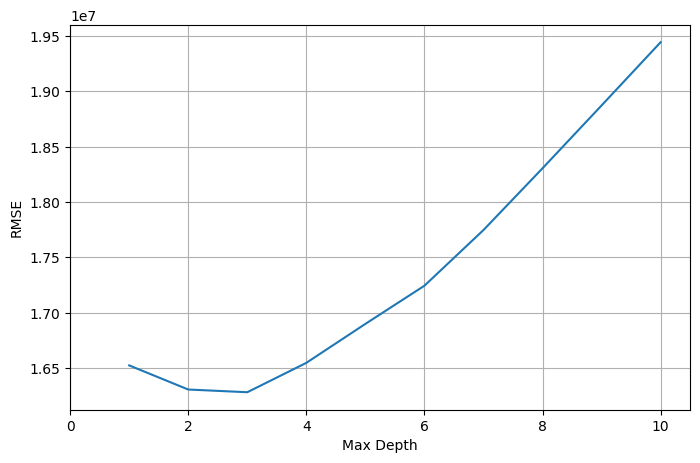

In [116]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()

In [117]:
#Re run with max depth = 3
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth=3 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)}")

CV RMSE: 16256263.86


CV RMSE: 16281457.14

In [118]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100

In [119]:
rmspe(y_test, y_pred)

5410.59579861249

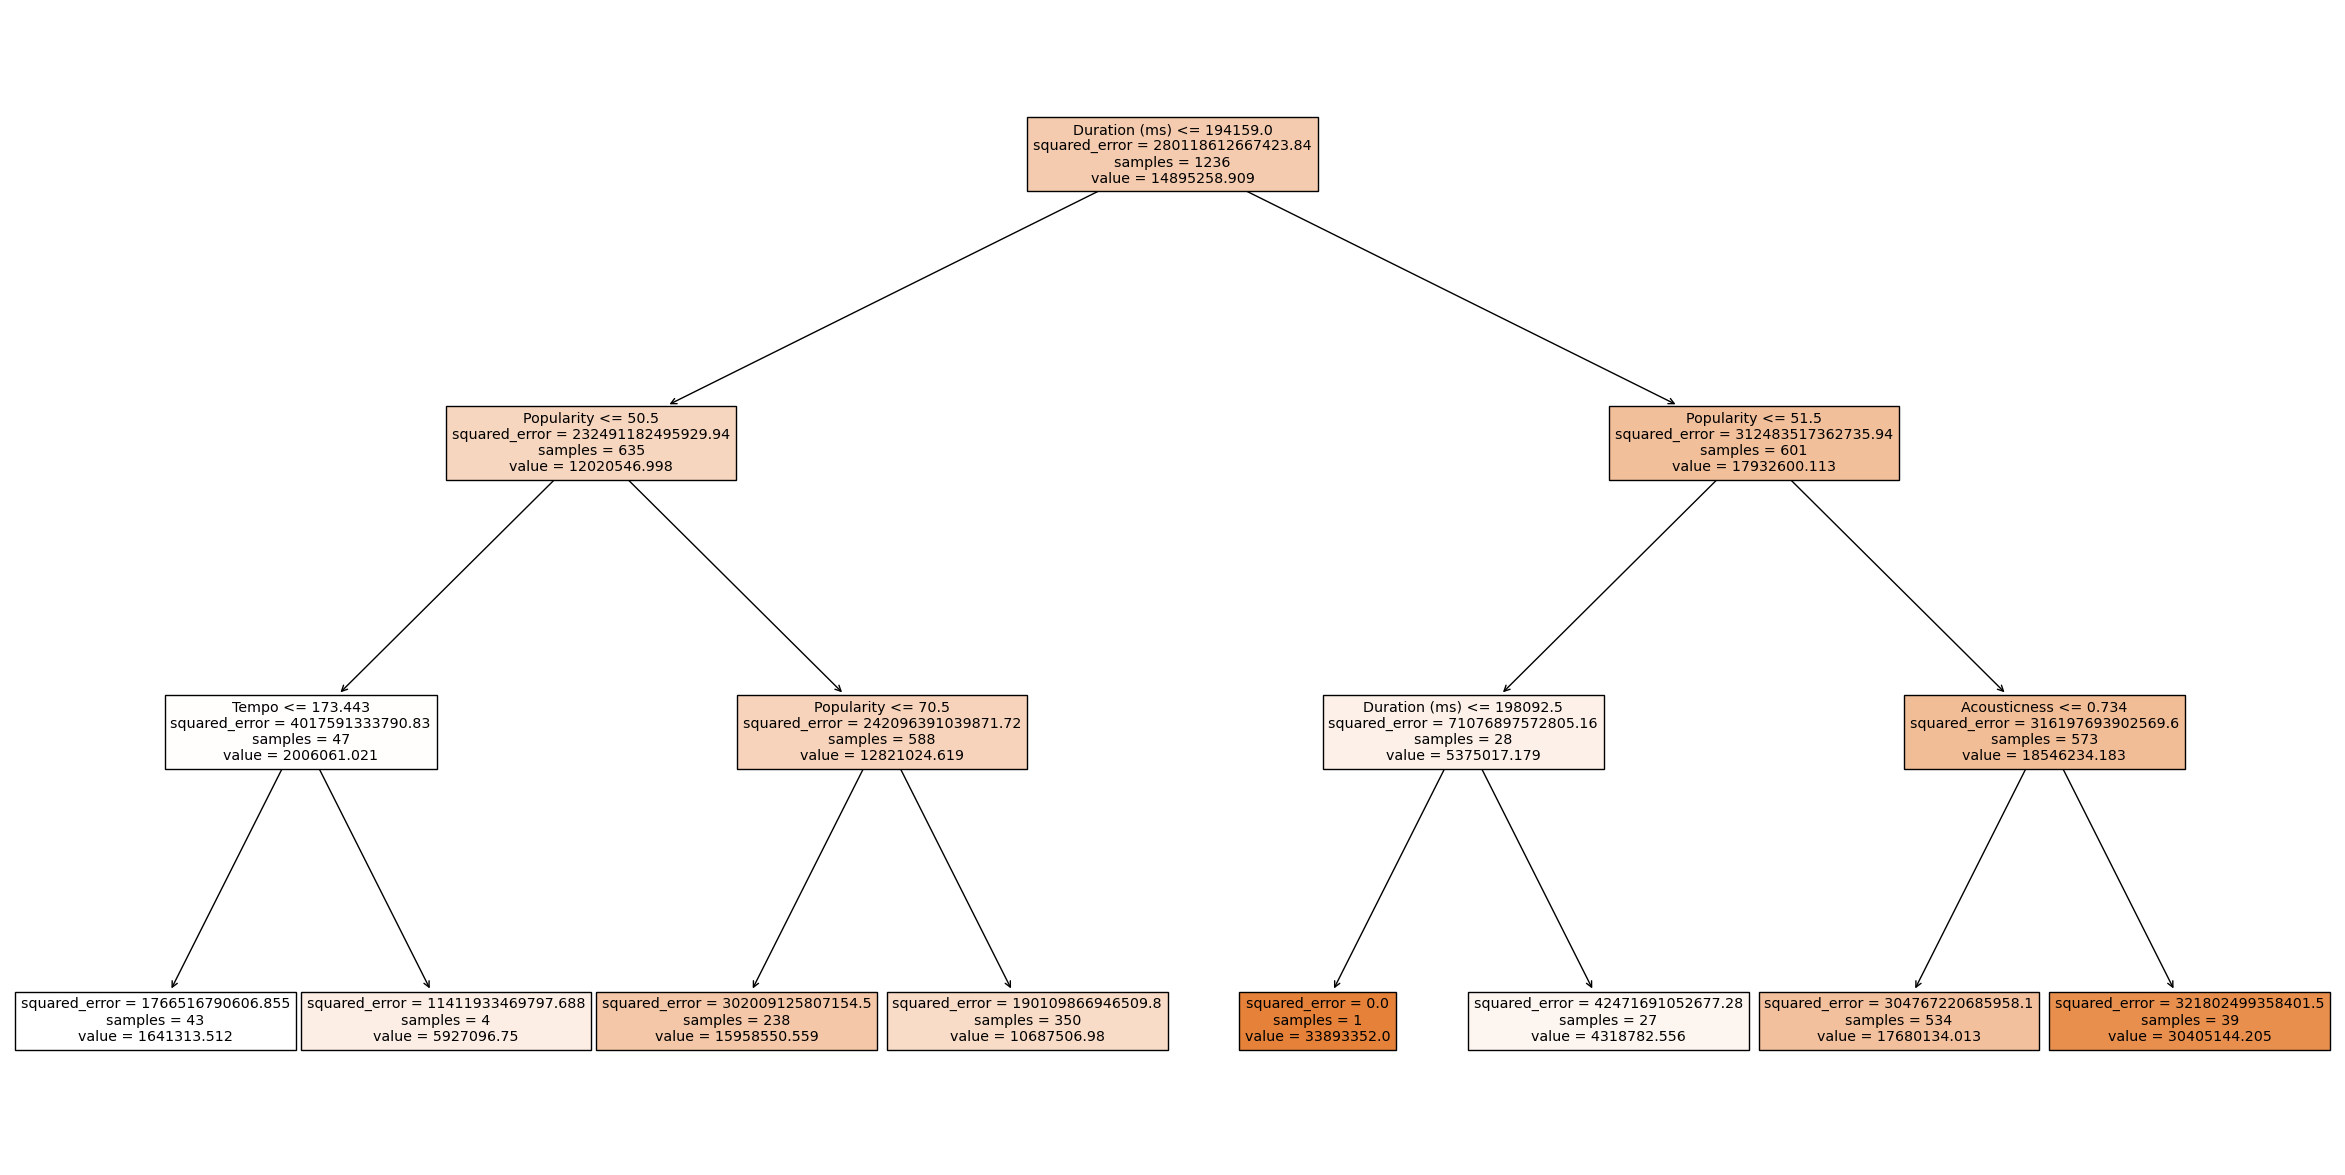

In [120]:
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)

In [121]:
#import re
#from xgboost.sklearn import XGBRegressor
#regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [122]:
#spotify_drop.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in spotify_drop.columns.values]


In [126]:
#re.findall('%genre%', spotify_drop.index)

##Random Forest

RMSE: 16856963.668895572
RMSE_std: 763134.7991603444

In [127]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()}')
print(f'RMSE_std: {np.sqrt(mean_error).std()}')
np.sqrt(mean_error)[:50]

RMSE: 16794114.95527635
RMSE_std: 805195.0462133969


array([16395577.22576437, 17462557.89813406, 15710740.61907103,
       17298326.4276328 , 16351229.86937473, 16769555.88108812,
       18120372.78869014, 16269319.00968013, 17097722.97158003,
       16488485.64349802, 16744871.84926726, 16030125.11848279,
       17718068.38397083, 16478703.97060557, 16243394.91801295,
       18079888.07569795, 16088233.04685693, 18156588.19093551,
       17201068.67311041, 16452223.2714358 , 18150183.16488133,
       16121249.93973914, 16463498.78284021, 16842765.5791359 ,
       16255504.86098273, 15068186.16619862, 17222610.14762636,
       18514933.6763456 , 17557123.12238436, 17476113.4081861 ,
       17621245.94188095, 16299456.96381058, 17348207.31923299,
       16671825.84131648, 16857815.8896773 , 16210064.99576579,
       17981767.63541272, 16354975.45407026, 16337809.38142098,
       16807659.66086997, 17690382.6122553 , 18078006.55440482,
       16240317.74985588, 15610540.47253459, 16677058.35957696,
       17031734.07060034, 16320532.84452

In [128]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [129]:
pickle.dump(rfModel, open('rfModel.p','wb'))

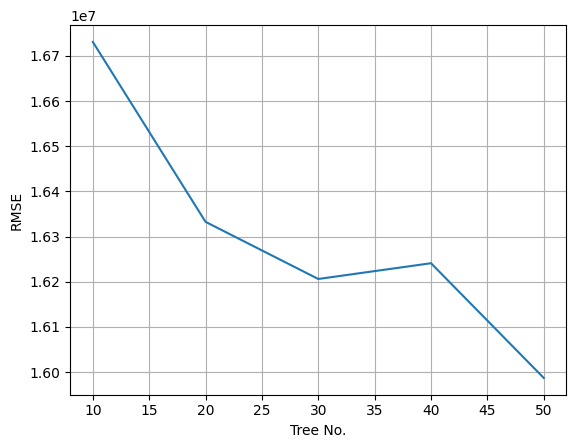

In [130]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [131]:
pd.DataFrame( zip( rmse_results, std_results, ) )

,0,1
0,1.673098e+07,791087.099707
1,1.633245e+07,790877.345954
2,1.620593e+07,768309.277360
3,1.624082e+07,823911.972490
4,1.598679e+07,768698.770493


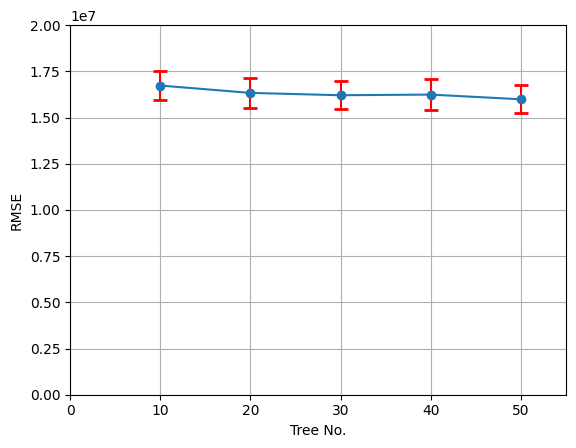

In [152]:
#plt.errorbar(num_trees, rmse_results, yerr=(std_results*2,std_results*2))
#plt.errorbar(num_trees, rmse_results, yerr=std_results)
plt.errorbar(num_trees, rmse_results, yerr=std_results, fmt='-o', capsize=5, capthick=2, ecolor='red')
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.ylim(0,2e7)
plt.xlim(0,55)
plt.grid()

In [133]:
print(f'RMSE with 50 trees: {rmse_results[4]}')

RMSE with 50 trees: 15986790.646658882


RMSE with 50 trees: 16205933.176706972

In [134]:
import graphviz
from IPython.display import display
from sklearn import tree

In [135]:
len(rfModel.estimators_)

50

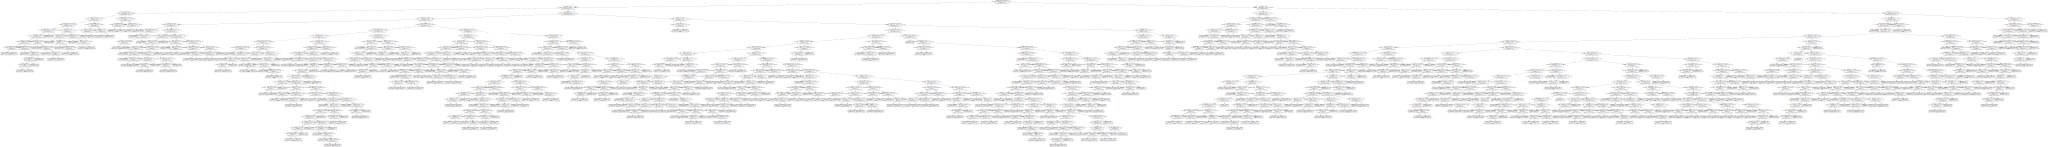

In [136]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

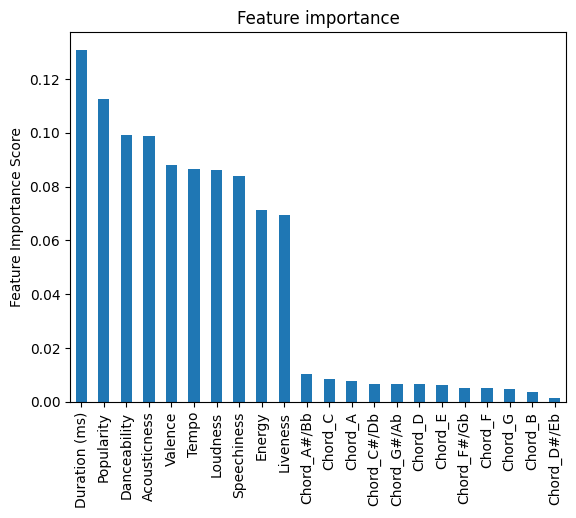

In [137]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importance")
plt.ylabel('Feature Importance Score') ;

In [138]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()

Duration (ms)     13.082500
Popularity        24.336886
Danceability      34.248446
Acousticness      44.116907
Valence           52.926825
Tempo             61.590502
Loudness          70.213787
Speechiness       78.624038
Energy            85.754528
Liveness          92.702146
Chord_A#/Bb       93.737427
Chord_C           94.591624
Chord_A           95.351894
Chord_C#/Db       96.032780
Chord_G#/Ab       96.704464
Chord_D           97.372585
Chord_E           97.983582
Chord_F#/Gb       98.494959
Chord_F           98.993970
Chord_G           99.489426
Chord_B           99.858063
Chord_D#/Eb      100.000000
dtype: float64

##XGBoost

In [139]:
#XGBoost Run
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)


print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

RMSE: 17090355.40480717


- Original:  RMSE: 17090355.40480717
- {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
- RMSE: 16064781.98

In [140]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100

In [141]:
rmspe(y_test, y_pred)

8303.506809466411

In [142]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}


In [143]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      learning_rate = 0.1,
      max_depth = 3,
      n_estimators = 20,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

RMSE: 16024699.895042643


In [144]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100

In [145]:
rmspe(y_test, y_pred_xgb)

6177.240011812434

<ipython-input-146-5bfe4b1d14b9>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


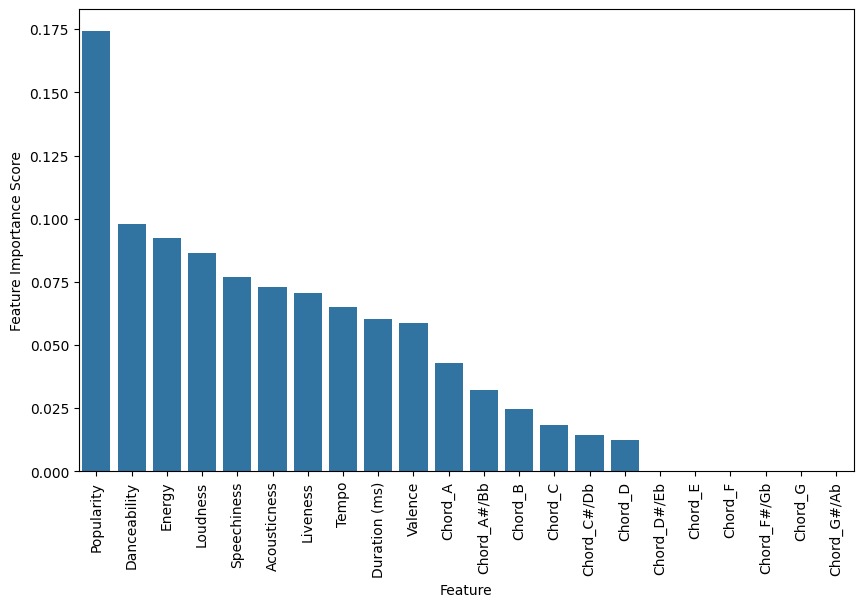

In [146]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns)
plt.figure(figsize = (10,6))
# ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax = sns.barplot(x = feat_imp.index, y = feat_imp.sort_values( ascending = False ).values )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score');

In [147]:
(feat_imp.sort_values( ascending = False )*100).cumsum()

Duration (ms)     17.416801
Popularity        27.217796
Acousticness      36.437622
Danceability      45.067230
Chord_A           52.777233
Valence           60.062881
Liveness          67.106628
Energy            73.597160
Loudness          79.622444
Speechiness       85.489601
Chord_E           89.783813
Tempo             93.011375
Chord_F           95.481140
Chord_G           97.332008
Chord_D           98.763611
Chord_C          100.000015
Chord_F#/Gb      100.000015
Chord_A#/Bb      100.000015
Chord_D#/Eb      100.000015
Chord_C#/Db      100.000015
Chord_B          100.000015
Chord_G#/Ab      100.000015
dtype: float32

#Communicate the Results

Target = Artist Followers

Decision Tree (with a max depth of 3):
CV RMSE: 16258447.8
RMSPE:  6859.418390802307

Random Forest:
RMSE: 16856963.66
RMSE_std: 763134.79
RMSE with 50 trees: 16205933.17

XGBoost
Original RMSE: 17090355.40480717
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
RMSE: 16064781.98 RMSPE: 8303.506809466411
    
Ultimately, XGBoost has the lowest RMSE.  Artist Followers may not be a good target.


